In [3]:
import numpy
import nibabel as nib
import os
import matplotlib.pyplot as plt

# Result display - Theory

This section will guide you through proper image result display/ </br>
For the purpose of QSM testing we have 3 important steps to show </br>
I. Phase unwrapping: Complex MR signal is composed of Magnitude and Phase. MR phase is proportional to local deviations in the static magnetic field (Hz). Measured phase is a projection of the true phase into the 2pi range. 



In [4]:
# Selecting slice 
def display_nifti_slice(filepath, slice_number, cbr_title, inf_limit = None, sup_limit = None, xlim = None, ylim = None, cmap = "gray"):
    # Load the NIfTI image
    img = nib.load(filepath)
    
    # Get the data as a numpy array
    img_data = img.get_fdata()
    
    # Check if the specified slice number is within bounds
    if slice_number < 0 or slice_number >= img_data.shape[2]:
        print("Slice number out of range. Please select a valid slice number.")
        return

    # Select the specified slice
    slice_data = img_data[:, :, slice_number]
    
    # Display the slice
    plt.figure(figsize=(6, 6))
    if inf_limit is None and sup_limit is None:
        plt.imshow(slice_data.T, cmap=cmap, origin='lower')
    else:
        plt.imshow(slice_data.T, cmap=cmap, origin='lower', vmin=inf_limit, vmax=sup_limit)
   
    cbr= plt.colorbar()
    cbr.set_label(cbr_title, rotation = 0, labelpad = 15, fontsize = 15)
    slice_number += 1
    plt.title(f'Slice {slice_number}')

    if xlim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.xlim(xlim)

    if ylim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.ylim(ylim)

    plt.axis('off')
    plt.show()



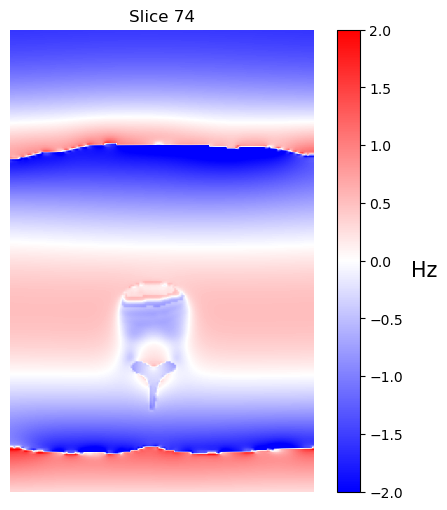

In [5]:
 # Select a long path outside of this folder
long_path = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/db0_AMU_VC_fm_ppm.nii.gz"
 
display_nifti_slice(long_path, 73, 'Hz', inf_limit=-2, sup_limit= 2, cmap = 'bwr')


#display_nifti_slice(path_to_img, 73, 'Hz', inf_limit=-400, sup_limit=400, cmap = 'bwr')
# The number 73 is an example of slice selection, which is the "z" dimension to show an axial slice

# Converting Perfect Local field [ppm] to Hz!

In [12]:
# Load the ppm local field
local_field_ppm_img = nib.load("E:/msc_data/sc_qsm/data/wb/data/local_field_gold_crop.nii.gz")
local_field_ppm_data = local_field_ppm_img.get_fdata()
local_field_Hz_data = 3 * 42.58 * local_field_ppm_data
# Now we remove the Hz value of sc_csf in orther to get the local difference between sc_wm and sc_gm
sub_csf_Hz = -603.6
local_field_Hz_data = local_field_Hz_data - sub_csf_Hz

# New image for this local field
local_field_Hz_img = nib.Nifti1Image(local_field_Hz_data, affine = local_field_ppm_img.affine)

nib.save(local_field_Hz_img,"E:/msc_data/sc_qsm/data/wb/data/local_field_Hz_gold_crop.nii.gz")

# After Chimaps are calculated, we need to add the Chi of CSF to have comparable to initial ground truth ChiMap </br>
This assumes your chimap has been reference to the average of a Spinal Cord mask, therefore adding chi of csf manually retrieves image for comparison to Ground Truth

In [8]:
chimap_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_4_4_24/dipole_inversion_tests/TKD/test1_def_thr_15/brain_mask/PDF_LocalField/test1_pdf_default/Sepia_Chimap.nii.gz"
chimap_img = nib.load(chimap_path)

chimap_data = chimap_img.get_fdata()

# Now add the chi value everywhere of CSF

chimap_mod = chimap_data - 9.05
# Should save in the same folder with mark like moded or mod_csf
new_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_4_4_24/dipole_inversion_tests/TKD/test1_def_thr_15/brain_mask/PDF_LocalField/test1_pdf_default/Chimap_Mod_CSF.nii.gz"
chi_mod_img = nib.Nifti1Image(chimap_mod, affine = chimap_img.affine)
nib.save(chi_mod_img, new_path)